# Product Decomposition using PlasmoAlgorithms

We illustrate the use of lagrangean decomposition using PlasmoAlgorithms solving the following problem

<img src="casestudy.png" style="width:200px">

using product decomposition

<img src="Product.png" style="width:500px">

each node represent a model for a single product. The nodes are connected through capacity variables.

## 1. Load required packages

In [26]:
using Plasmo
using PlasmoAlgorithms
using Gurobi
using GraphPlot
using Plots

## 2. Get the model

The file `modelgen.jl` contains a function that generates a model taking a product as input 

In [2]:
include("modelgen.jl")

model (generic function with 3 methods)

## 3. Generate the Plasmo graph

1. Create a PlasmoGraph object and set the solver for the graph
2. Create an array of nodes 
3. Generate and add the model to the graph and 

In [3]:
g = PlasmoGraph()
setsolver(g, GurobiSolver(OutputFlag=0))

node = []

products = 1:3
for i in products
    n = add_node(g)
    m = model(i)
    setmodel(n,m)
    push!(node,n)
end

## 4. Add linking constraints

We add the linking capacity constraints, and also create copies of the graph to try different options

In [4]:
@linkconstraint(g, [s in sites, i in 1:products[end-1], t in otime],node[i][:hf][s,i,t] == node[i+1][:hi][s,i+1,t])

g2 = deepcopy(g)
g3 = deepcopy(g)
g4 = deepcopy(g)

getlinkconstraints(g)

18-element Array{JuMP.AbstractConstraint,1}:
 -hi[1,2,1] + hf[1,1,1] = 0
 -hi[2,2,1] + hf[2,1,1] = 0
 -hi[3,2,1] + hf[3,1,1] = 0
 hf[1,2,1] - hi[1,3,1] = 0 
 hf[2,2,1] - hi[2,3,1] = 0 
 hf[3,2,1] - hi[3,3,1] = 0 
 -hi[1,2,2] + hf[1,1,2] = 0
 -hi[2,2,2] + hf[2,1,2] = 0
 -hi[3,2,2] + hf[3,1,2] = 0
 hf[1,2,2] - hi[1,3,2] = 0 
 hf[2,2,2] - hi[2,3,2] = 0 
 hf[3,2,2] - hi[3,3,2] = 0 
 -hi[1,2,3] + hf[1,1,3] = 0
 -hi[2,2,3] + hf[2,1,3] = 0
 -hi[3,2,3] + hf[3,1,3] = 0
 hf[1,2,3] - hi[1,3,3] = 0 
 hf[2,2,3] - hi[2,3,3] = 0 
 hf[3,2,3] - hi[3,3,3] = 0 

## (Optional) 5. Plot the Graph

Thanks to the GraphPlot package we can plot our Plasmo graph. To correctly plot the graph we define the edges, which are not necessary to apply the lagrange algorithms.

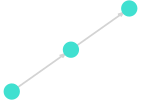

In [5]:
for i = 1:length(node)-1
    add_edge(g,node[i],node[i+1])
end
gplot(g.graph)

## 6. Solve the problem

We will solve the problem using different options for illustrative purposes

### Solve with default parameters

```
update_method = :subgradient
lagrangeheuristic = :fixbinaries
initialmultipliers = :zero
```

In [6]:
r = lagrangesolve(g, max_iterations=50)

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
-----------------
 Iteration 1
-----------------
Iteration Value : 0.0
Iteration Bound : 54607.500000000015
Objective Value : 0.0
Best Bound : 54607.500000000015
Gap : Inf %
Iteration Time : 1.31 s
Elapsed Time : 1.34 s
α = 2.0
Academic license - for non-commercial use only
-----------------
 Iteration 2
-----------------
Iteration Value : 33026.05000000002
Iteration Bound : 60214.960082749225
Objective Value : 33026.05000000002
Best Bound : 54607.500000000015
Gap : 65.35 %
Iteration Time : 0.02 s
Elapsed Time : 1.72 s
α = 2.0
-----------------
 Iteration 3
-----------------
Iteration Value : 37635.70000000001
Iteration Bound : 55485.612807333484
Objective Value : 37635.70000000001
Best Bound : 54607.500000000015
Gap : 45.09 %
Iteration Time : 0.01 s
Elapsed Time : 1.73 s
α = 2.0
-----------------
 Iteration 4
-----------------
Iteration Value : 3

-----------------
 Iteration 46
-----------------
Iteration Value : 41534.883333333346
Iteration Bound : 41878.73593589953
Objective Value : 41534.883333333346
Best Bound : 41878.73593589953
Gap : 0.83 %
Iteration Time : 0.0 s
Elapsed Time : 2.03 s
α = 0.125
-----------------
 Iteration 47
-----------------
Iteration Value : 41534.883333333346
Iteration Bound : 41897.9745616644
Objective Value : 41534.883333333346
Best Bound : 41878.73593589953
Gap : 0.83 %
Iteration Time : 0.01 s
Elapsed Time : 2.04 s
α = 0.125
-----------------
 Iteration 48
-----------------
Iteration Value : 41534.883333333346
Iteration Bound : 41894.027401263986
Objective Value : 41534.883333333346
Best Bound : 41878.73593589953
Gap : 0.83 %
Iteration Time : 0.01 s
Elapsed Time : 2.05 s
α = 0.125
-----------------
 Iteration 49
-----------------
Iteration Value : 41534.883333333346
Iteration Bound : 41877.94757638175
Objective Value : 41534.883333333346
Best Bound : 41877.94757638175
Gap : 0.83 %
Iteration Time : 

### Solve with multipliers initialized from the LP relaxation

In [11]:
r2 = lagrangesolve(g2, max_iterations=50, initialmultipliers=:relaxation)

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
-----------------
 Iteration 1
-----------------
Iteration Value : 0.0
Iteration Bound : 42343.81785626299
Objective Value : 0.0
Best Bound : 42343.81785626299
Gap : Inf %
Iteration Time : 0.01 s
Elapsed Time : 0.01 s
α = 2.0
Academic license - for non-commercial use only
-----------------
 Iteration 2
-----------------
Iteration Value : 37993.55000000002
Iteration Bound : 50994.419107282476
Objective Value : 37993.55000000002
Best Bound : 42343.81785626299
Gap : 11.45 %
Iteration Time : 0.0 s
Elapsed Time : 0.02 s
α = 2.0
-----------------
 Iteration 3
-----------------
Iteration Value : 33960.65000000002
Iteration Bound : 63395.00812684767
Objective Value : 37993.55000000002
Best Bound : 42343.81785626299
Gap : 11.45 %
Iteration Time : 0.0 s
Elapsed Time : 0.02 s
α = 1.0
-----------------
 Iteration

-----------------
 Iteration 45
-----------------
Iteration Value : 41534.883333333346
Iteration Bound : 41959.17455527372
Objective Value : 41534.883333333346
Best Bound : 41959.17455527372
Gap : 1.02 %
Iteration Time : 0.0 s
Elapsed Time : 0.32 s
α = 0.015625
-----------------
 Iteration 46
-----------------
Iteration Value : 41534.883333333346
Iteration Bound : 41958.171205774015
Objective Value : 41534.883333333346
Best Bound : 41958.171205774015
Gap : 1.02 %
Iteration Time : 0.01 s
Elapsed Time : 0.32 s
α = 0.015625
-----------------
 Iteration 47
-----------------
Iteration Value : 41534.883333333346
Iteration Bound : 41955.52877351806
Objective Value : 41534.883333333346
Best Bound : 41955.52877351806
Gap : 1.01 %
Iteration Time : 0.01 s
Elapsed Time : 0.33 s
α = 0.015625
-----------------
 Iteration 48
-----------------
Iteration Value : 41534.883333333346
Iteration Bound : 41959.99608277585
Objective Value : 41534.883333333346
Best Bound : 41955.52877351806
Gap : 1.01 %
Iterat

-----------------
 SOLUTION SUMMARY
-----------------
Method: dual_decomposition
Objective Value : 41534.883333333346
Best Bound : 41953.666203747256
Gap : 1.01 %
Iterations : 50
Solution Time : 0.35 s
Termination : Max Iterations


### Solve with probing subgradient method


In [7]:
r3 = lagrangesolve(g3, max_iterations=50, update_method=:probingsubgradient)

-----------------
 SOLUTION SUMMARY
-----------------
Method: dual_decomposition
Objective Value : 41534.883333333346
Best Bound : 41877.94757638175
Gap : 0.83 %
Iterations : 50
Solution Time : 2.07 s
Termination : Max Iterations
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
-----------------
 Iteration 1
-----------------
Iteration Value : 0.0
Iteration Bound : 54607.500000000015
Objective Value : 0.0
Best Bound : 54607.500000000015
Gap : Inf %
Iteration Time : 0.01 s
Elapsed Time : 0.01 s
α = 2.0
Academic license - for non-commercial use only
-----------------
 Iteration 2
-----------------
Iteration Value : 33026.05000000002
Iteration Bound : 51275.439843869215
Objective Value : 33026.05000000002
Best Bound : 51275.439843869215
Gap : 55.26 %
Iteration Time : 0.01 s
Elapsed Time : 0.1 s
α = 2.0
-----------------
 Iteration 3
-----------------
Iteration Value : 35620.63333333334
Iteration Bo

-----------------
 Iteration 36
-----------------
Iteration Value : 41534.883333333346
Iteration Bound : 41913.22388204093
Objective Value : 41534.883333333346
Best Bound : 41892.284868801806
Gap : 0.86 %
Iteration Time : 0.01 s
Elapsed Time : 0.62 s
α = 0.25
-----------------
 Iteration 37
-----------------
Iteration Value : 41534.883333333346
Iteration Bound : 41869.341903817636
Objective Value : 41534.883333333346
Best Bound : 41869.341903817636
Gap : 0.81 %
Iteration Time : 0.01 s
Elapsed Time : 0.63 s
α = 0.25
-----------------
 Iteration 38
-----------------
Iteration Value : 40547.05000000002
Iteration Bound : 41940.923626740696
Objective Value : 41534.883333333346
Best Bound : 41869.341903817636
Gap : 0.81 %
Iteration Time : 0.01 s
Elapsed Time : 0.65 s
α = 0.125
-----------------
 Iteration 39
-----------------
Iteration Value : 41534.883333333346
Iteration Bound : 41915.546108402734
Objective Value : 41534.883333333346
Best Bound : 41869.341903817636
Gap : 0.81 %
Iteration Ti

## 7. Plot and compare

### Default parameters

In [32]:
plot(1:length(r.iterbound), [r.iterbound,r.iterval], ylim=(30000,80000),xlabel="Iteration",lw=2,label=["UB" "LB"])

In [29]:
plot(1:length(r.iterbound), [r.iterbound, r2.iterbound], 
    title="Zero vs LP Relaxation initial multipliers",
    label=["Zero" "LP Relaxation"],
    xlabel="Iteration",
    lw=2)

In [31]:
plot(1:length(r.iterbound), [r.iterbound, r3.iterbound], 
    title="Probing Subgradient vs Standard Subgradient",
    label=["Standard" "Probing"],
    xlabel="Iteration",
    lw=2)